In [90]:
import pandas as pd
import numpy as np
from numpy import newaxis

import random
import itertools

import os
from os import listdir
from os.path import isfile
import math

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.collections
from matplotlib import gridspec

import datetime
from tqdm import *
from datetime import *

import keras
from keras.applications import *
import lightgbm as lgbm
import os
from scipy import ndimage
from scipy import misc
from scipy import signal
import cv2
plt.ion()
plt.show()

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Lambda, Layer,Flatten, Conv2D, MaxPooling2D,UpSampling2D, concatenate, Dropout,Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

import shutil
import collections
from collections import *
from keras import optimizers
import tensorflow as tf
from IPython.display import clear_output
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

from sklearn.utils import class_weight
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from os.path import isfile, join
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from mpl_toolkits.axes_grid1 import ImageGrid
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from skimage import morphology

from skimage import filters
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
%matplotlib inline


In [2]:
basedir = 'data/Data_Datathon_Kaufland'
cat = []
filepath = []
for d in listdir(basedir):
    for img in listdir(basedir + '/' + d):
        cat.append(d)
        filepath.append(basedir + '/' + d + '/' + img)
len(cat)
len(filepath)

37795

37795

In [46]:
img_width, img_height = 480, 640
img_size = 240
def normalize(arr):
    arr=arr.astype('float32')
    if arr.max() > 1.0:
        arr/=255.0
        arr = arr - arr.mean()
        arr = arr/arr.std()
    return arr

def resizeImg(Xg, newDimension = (img_size, img_size)):
    Xg = normalize(Xg)
    if Xg.shape[0] >= newDimension[0]:
        return cv2.resize(Xg,newDimension, cv2.INTER_AREA)
    else:
        return cv2.resize(Xg,newDimension, cv2.INTER_CUBIC)

    
def readAndResize(filename):
    dog = misc.imread(filename)
    return resizeImg(dog)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def grayscale(img):
    if len(img.shape) > 2 and img.shape[2] >= 3:
        img = rgb2gray(img)
    return img

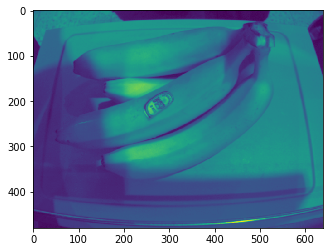

(480, 640)


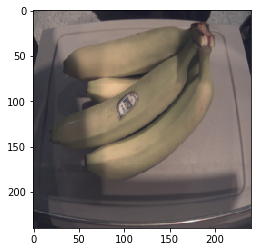

In [34]:
random_id= random.randint(0, len(filepath))
img = misc.imread(filepath[random_id])
img = grayscale(img)
plt.imshow(img)
plt.show()
plt.imshow(readAndResize(filepath[random_id]))
print(img.shape)

In [ ]:
# #== Parameters =======================================================================
# BLUR = 21
# CANNY_THRESH_1 = 10
# CANNY_THRESH_2 = 200
# MASK_DILATE_ITER = 10
# MASK_ERODE_ITER = 10
# MASK_COLOR = (0.0,0.0,1.0) # In BGR format


# #== Processing =======================================================================

# #-- Read image -----------------------------------------------------------------------
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# #-- Edge detection -------------------------------------------------------------------
# edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
# edges = cv2.dilate(edges, None)
# edges = cv2.erode(edges, None)

# #-- Find contours in edges, sort by area ---------------------------------------------
# contour_info = []
# _, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# for c in contours:
#     contour_info.append((
#         c,
#         cv2.isContourConvex(c),
#         cv2.contourArea(c)
#     ))
# contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
# max_contour = contour_info[0]

# #-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# # Mask is black, polygon is white
# mask = np.zeros(edges.shape)
# cv2.fillConvexPoly(mask, max_contour[0], (255))

# #-- Smooth mask, then blur it --------------------------------------------------------
# mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
# mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
# mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
# mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

# #-- Blend masked img into MASK_COLOR background --------------------------------------
# mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
# img         = img.astype('float32') / 255.0                 #  for easy blending

# masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
# masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

# cv2.imshow('img', masked)                                   # Display
# cv2.waitKey()

(480, 640)

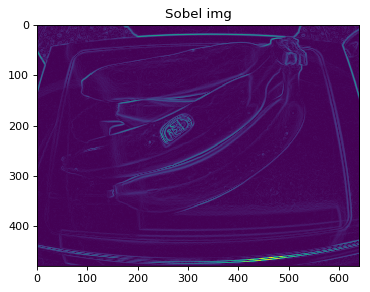

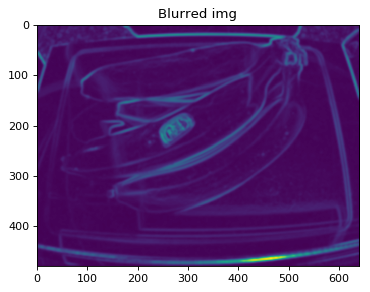

In [62]:
img.shape
sobel = filters.sobel(img)


plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['figure.dpi'] = 80

plt.title('Sobel img')
plt.imshow(sobel)
plt.show()

blurred = filters.gaussian(sobel, sigma=2.0)
plt.title('Blurred img')
plt.imshow(blurred)

In [39]:
np.min(img)
np.max(img)

23.77

250.10499999999996

319

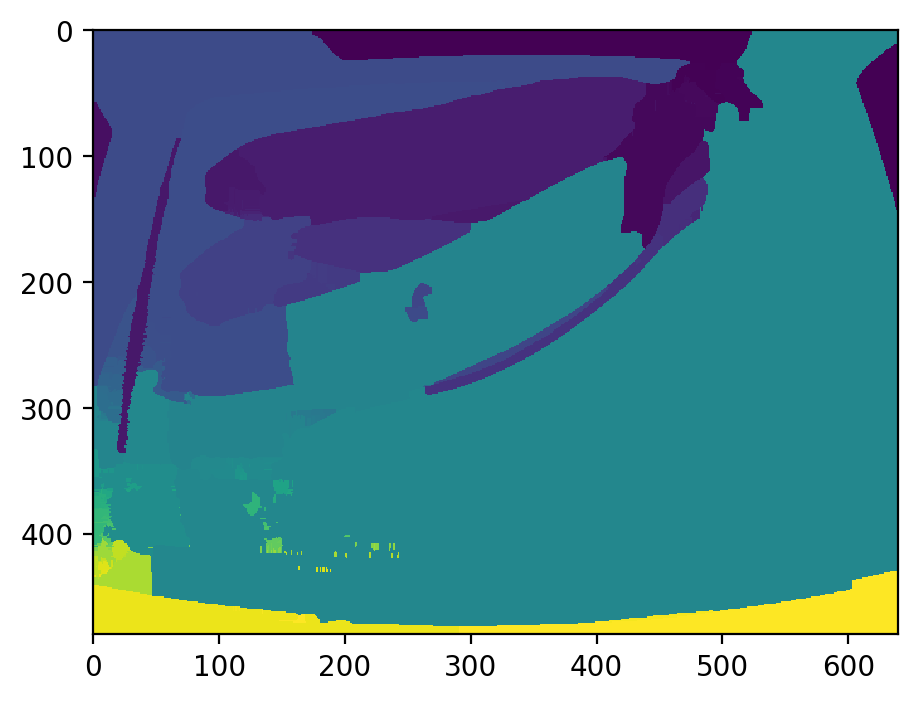

In [43]:
light_spots = np.array((img > 190).nonzero()).T
dark_spots = np.array((img < 50).nonzero()).T

bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)


In [11]:
df = pd.DataFrame()
df['path'] = pd.Series(filepath)
df['cat']= pd.Series(cat)
df.head()

,path,cat
0,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido
1,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido
2,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido
3,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido
4,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido


In [12]:
df['cat'].unique()

array(['1073_Kuerbis Hokkaido', '_5233_Spitzkohl',
       '_7777_Wassermelone gelb', '_5032_Landgurken', '9118_Spitzpaprika',
       '3917_Pfirsiche', '_9275_Zwiebeln weiss', '_3959_Pflaumen',
       '6911_aepfel', '1044_Kochbananen', '9055_Birnen Abate Fetel',
       '3942_Paprika orange', '_6294_Champignon Riesen', '_5277_Kopfkohl',
       '_7389_Meerrettich', '_7347_Auberginen Graff', '_6322_Buschbohnen',
       '_5074_Chinakohl', '_3992_Zwetschgen', '4671_Kartoffeln rotsch',
       '_7276_Filderkohl', '_6210_Wirsing', '3855_Kirschen',
       '3247_Zwiebeln', '6967_Kartoffeln fk', '_7762_Zwiebeln rot',
       '6297_Zucchini gelb', '_6115_Rotkohl', '_9729_Kraeuterseitlinge',
       '_3927_Paprika gruen', '_3790_Trauben kernlos',
       '_6696_Einlegegurken', '_5885_Wassermelone',
       '9045_aepfel Pink Lady', '6667_Pflaumen gelb', '5949_Moehren',
       '9015_Mandarinen', '3820_Paprika gelb', '_6178_Weisskohl',
       '_6534_Knoblauch', '_5160_Rote Bete', '7025_Kuerbisspezialitaet'

In [13]:
le = preprocessing.LabelEncoder()
le.fit(df.cat.unique())
print(list(le.classes_)[:10])
print(le.inverse_transform([1]))
df['y'] = le.transform(df.cat) 
df.head()

LabelEncoder()

['1044_Kochbananen', '1073_Kuerbis Hokkaido', '2613_Plattpfirsiche', '3247_Zwiebeln', '3266_Erdbeeren', '3820_Paprika gelb', '3824_Aprikosen', '3855_Kirschen', '3888_Nektarinen', '3917_Pfirsiche']
['1073_Kuerbis Hokkaido']


,path,cat,y
0,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
1,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
2,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
3,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
4,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1


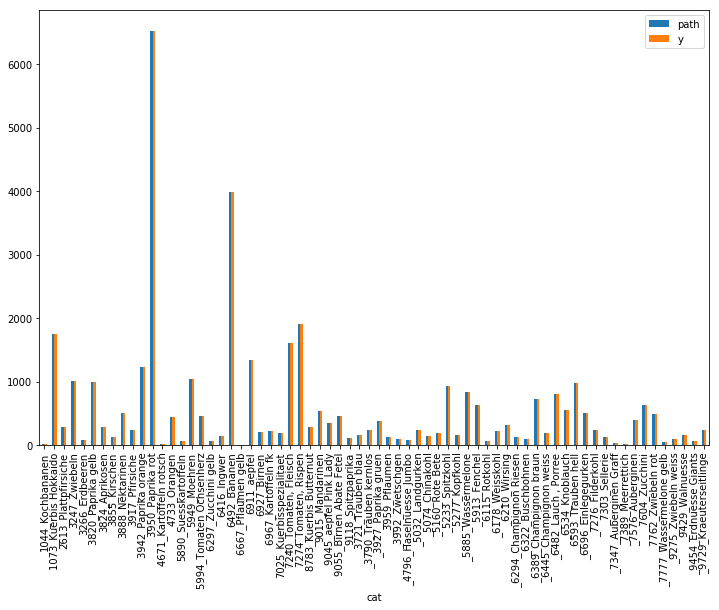

In [14]:
df.groupby('cat').agg('count').plot(kind ='bar', figsize=(12, 8))
# plt.xticks(rotation=0.6)

In [15]:
y_train = to_categorical(df['y'].values)
y_train.shape

(37795, 68)

In [16]:
def y_test_to_labels(y_test):
    inverted = np.apply_along_axis(np.argmax, 1, y_test)
    return le.inverse_transform(inverted)
y_test_to_labels(y_train[:2])

array(['1073_Kuerbis Hokkaido', '1073_Kuerbis Hokkaido'], dtype=object)

## Inception

In [83]:
base_model =VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in base_model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(68, activation="softmax")(x)

# creating the final model 
model = Model(input = base_model.input, output = predictions)

# compile the model 
model.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 480, 640, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 480, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 480, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 240, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 240, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 240, 320, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 120, 160, 128)     0         
__________

/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [81]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape = (img_width, img_height, 3))

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(68, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, 480, 640, 3)   0                                            
____________________________________________________________________________________________________
conv2d_189 (Conv2D)              (None, 239, 319, 32)  864         input_8[0][0]                    
____________________________________________________________________________________________________
batch_normalization_189 (BatchNo (None, 239, 319, 32)  96          conv2d_189[0][0]                 
____________________________________________________________________________________________________
activation_189 (Activation)      (None, 239, 319, 32)  0           batch_normalization_189[0][0]    
___________________________________________________________________________________________

In [84]:
df.shape
train = df.sample(frac = 0.8)
test = df[~df.index.isin(train.index)]

train.shape
test.shape
test.head()

(37795, 3)

(30236, 3)

(7559, 3)

,path,cat,y
3,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
8,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
9,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
10,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
13,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1


In [ ]:
train.groupby('cat').agg('count').plot(kind ='bar', figsize=(12, 8))

test.groupby('y').agg('count').plot(kind ='bar', figsize=(12, 8))

In [ ]:
1/df.groupby('y').agg('count').reset_index()['cat'].values
weights

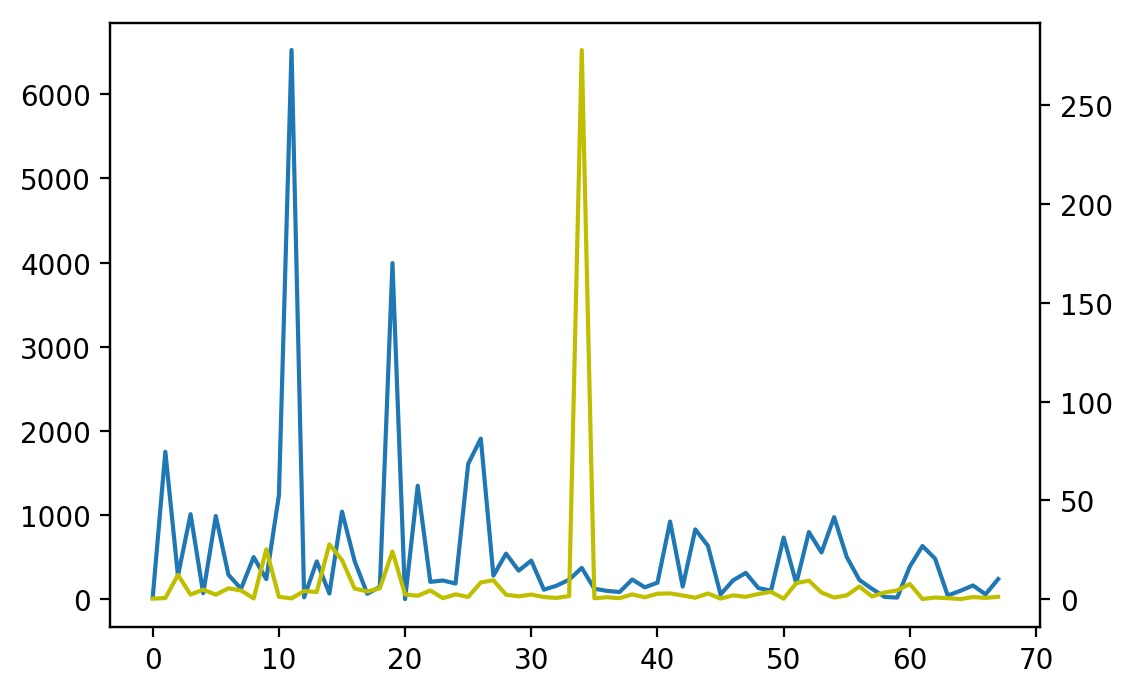

In [50]:
weights= class_weight.compute_class_weight('balanced', df.y.unique(), df.y.values)
plt.plot(np.arange(len(weights)),df.groupby('y').agg('count').reset_index()['cat'].values)
ax2 = plt.twinx()
ax2 = plt.plot(np.arange(len(weights)),weights, color='y')
# df.groupby('y').agg('count').plot(kind ='bar', figsize=(12, 8))

In [85]:
from keras.applications.vgg19 import preprocess_input
# def generate_arrays_from_paths1(df, y_train):
#     while 1:
#         i= random.randint(0, df.shape[0])
#         img = misc.imread(df.iloc[i].path)
#         y = y_train[i]
#         yield (img[newaxis,:,:,:], y[newaxis,:])
        
        
def generate_arrays_from_paths(df):
    while 1:
        for i in range(df.shape[0]):
#             img = misc.imread(df.iloc[i].path)
#             x = image.img_to_array(img)
#             x = np.expand_dims(x, axis=0)
#             x = preprocess_input(x)
            
            img = normalize(misc.imread(df.iloc[i].path))
            y = np.zeros((1,68))
            y[0,df.iloc[i].y]=1
#             print(f'i = {i}, y = {df.iloc[i].y} ')
            yield (img[newaxis,:,:,:], y)
#             yield (x, y)
        
train.shape
# train = train[~train.y.isin([11,19])]
# train.shape
model.fit_generator(generate_arrays_from_paths(train),
#                     class_weight=weights,
                    steps_per_epoch=train.shape[0], epochs=2)



(30236, 3)

Epoch 1/2
30236/30236 [==============================] - 2790s - loss: 1.5818 - acc: 0.5693  
Epoch 2/2
 6810/30236 [=====>........................] - ETA: 2161s - loss: 0.8669 - acc: 0.7335

KeyboardInterrupt: 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         4
          1       0.88      0.97      0.92       368
          2       0.50      0.15      0.23        62
          3       0.85      0.90      0.88       201
          4       0.71      0.83      0.77        12
          5       0.70      0.85      0.77       209
          6       0.96      0.91      0.94        58
          7       0.87      0.48      0.62        27
          8       0.49      0.70      0.58        98
          9       0.31      0.35      0.33        51
         10       0.90      0.52      0.66       256
         11       0.84      0.93      0.88      1251
         12       0.00      0.00      0.00         4
         13       0.83      0.84      0.83        92
         14       0.53      0.50      0.51        18
         15       0.98      0.93      0.95       202
         16       0.00      0.00      0.00        94
         17       0.89      0.47      0.62   

/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([  4.04000000e+02,   1.80000000e+01,   2.12000000e+02,
          1.40000000e+01,   2.53000000e+02,   5.50000000e+01,
          1.50000000e+01,   1.41000000e+02,   5.80000000e+01,
          1.48000000e+02,   1.38400000e+03,   0.00000000e+00,
          9.30000000e+01,   1.70000000e+01,   1.92000000e+02,
          1.00000000e+00,   9.00000000e+00,   2.60000000e+01,
          8.66000000e+02,   0.00000000e+00,   2.93000000e+02,
          3.00000000e+00,   6.00000000e+01,   9.00000000e+00,
          2.54000000e+02,   4.73000000e+02,   5.10000000e+01,
          1.28000000e+02,   1.60000000e+01,   1.51000000e+02,
          3.00000000e+00,   1.80000000e+01,   0.00000000e+00,
          0.00000000e+00,   7.50000000e+01,   0.00000000e+00,
          3.30000000e+01,   0.00000000e+00,   7.00000000e+00,
          4.00000000e+01,   8.00000000e+01,   2.06000000e+02,
          2.00000000e+00,   1.71000000e+02,   1.89000000e+02,
          2.00000000e+00,   3.60000000e+01,   6.90000000e+01,
        

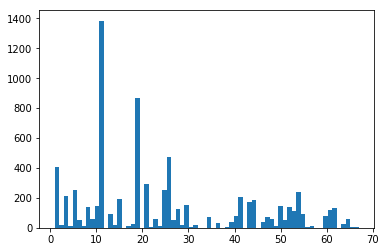

In [87]:
nb = 30
test = test.sample(frac = 1)
nb = test.shape[0]
pred = model.predict_generator(generate_arrays_from_paths(test), steps = nb)
print(classification_report(test.y[:nb], np.argmax(pred, axis = 1)))
print ('accuracy', accuracy_score(test.y[:nb], np.argmax(pred, axis = 1)))

plt.hist(np.argmax(pred, axis = 1), bins = 68)

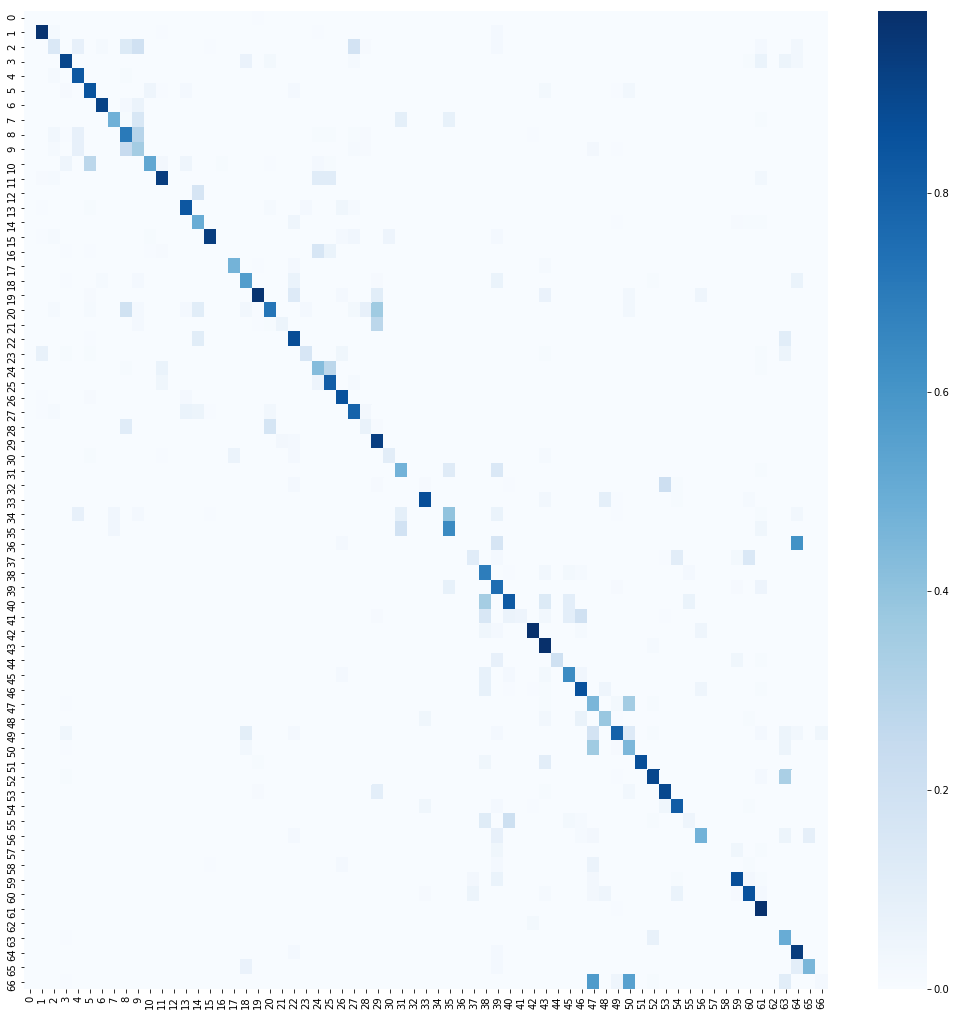

In [96]:
cm = np.stack(confusion_matrix(test.y[:nb], np.argmax(pred, axis = 1)))
ncm = np.divide(cm, cm.sum(axis=1))
plt.figure(figsize=(18, 18))
sns.heatmap(ncm, cmap = 'Blues')

In [110]:
list(zip(*np.where(ncm > .3)))

[(1, 1),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (13, 13),
 (14, 14),
 (15, 15),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (20, 29),
 (22, 22),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (29, 29),
 (31, 31),
 (33, 33),
 (34, 35),
 (35, 35),
 (36, 64),
 (38, 38),
 (39, 39),
 (40, 38),
 (40, 40),
 (42, 42),
 (43, 43),
 (45, 45),
 (46, 46),
 (47, 47),
 (47, 50),
 (48, 48),
 (49, 49),
 (50, 47),
 (50, 50),
 (51, 51),
 (52, 52),
 (52, 63),
 (53, 53),
 (54, 54),
 (56, 56),
 (59, 59),
 (60, 60),
 (61, 61),
 (63, 63),
 (64, 64),
 (65, 65),
 (66, 47),
 (66, 50)]

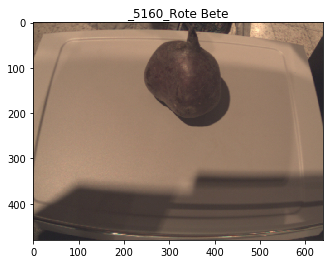

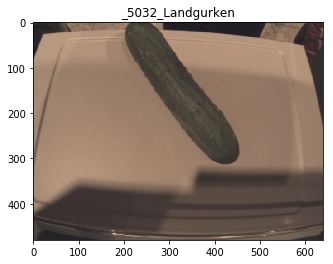

In [119]:
index = 4
c1 = 40
c2 = 38
plt.title(df[df.y == c1].cat.values[0])
plt.imshow(misc.imread(df[df.y == c1].path.values[index]))

plt.figure()
index = 0
plt.title(df[df.y == c2].cat.values[0])
plt.imshow(misc.imread(df[df.y == c2].path.values[index]))

In [113]:
df.head()

,path,cat,y
0,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
1,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
2,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
3,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
4,data/Data_Datathon_Kaufland/1073_Kuerbis Hokka...,1073_Kuerbis Hokkaido,1
